
# Baseline

### Import the necessary libraries

In [2]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mimetypes
import seaborn as sns 

# Sklearn libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, auc
from sklearn.base import BaseEstimator, TransformerMixin # to create classes
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import (SimpleImputer)
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, StandardScaler)
from matplotlib.colors import ListedColormap

import zlib, json, base64
import requests
import datetime
import matplotlib.ticker as mtick


#### Import the dataset

In [3]:
df_test = pd.read_csv('data/test_data.csv', 
                       index_col='observation_id',
                       header = 0)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, ae3e0d41-7c19-4ecc-8d32-767e3bfdb52a to d3441769-81a0-4988-9e36-5113aaacd2ac
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          4000 non-null   object 
 1   Date                          4000 non-null   object 
 2   Part of a policing operation  2691 non-null   object 
 3   Latitude                      2829 non-null   float64
 4   Longitude                     2829 non-null   float64
 5   Gender                        4000 non-null   object 
 6   Age range                     4000 non-null   object 
 7   Officer-defined ethnicity     4000 non-null   object 
 8   Legislation                   4000 non-null   object 
 9   Object of search              4000 non-null   object 
 10  station                       4000 non-null   object 
 11  prediction                    4000 non-null   float64
 12  

In [7]:
attributes = ['Type',
              'Part of a policing operation',
              'Gender', 
              'Age range', 
              'Officer-defined ethnicity', 
              'Legislation', 
              'Object of search', 
              'station']

for col in attributes:
    print(df_test[col].unique())

['Person search' 'Person and Vehicle search']
[False nan True]
['Male' 'Female' 'Other']
['18-24' '10-17' 'over 34' '25-34' 'under 10']
['Black' 'Asian' 'White' 'Other' 'Mixed']
['Criminal Justice Act 1988 (section 139B)'
 'Misuse of Drugs Act 1971 (section 23)'
 'Police and Criminal Evidence Act 1984 (section 1)'
 'Criminal Justice and Public Order Act 1994 (section 60)'
 'Firearms Act 1968 (section 47)'
 'Psychoactive Substances Act 2016 (s36(2))'
 'Poaching Prevention Act 1862 (section 2)']
['Offensive weapons' 'Controlled drugs' 'Article for use in theft'
 'Stolen goods' 'Firearms' 'Articles for use in criminal damage'
 'Fireworks' 'Psychoactive substances' 'Game or poaching equipment'
 'Evidence of offences under the Act']
['nottinghamshire' 'cambridgeshire' 'city-of-london' 'devon-and-cornwall'
 'durham' 'bedfordshire']


In [8]:
df_test.isna().sum()

Type                               0
Date                               0
Part of a policing operation    1309
Latitude                        1171
Longitude                       1171
Gender                             0
Age range                          0
Officer-defined ethnicity          0
Legislation                        0
Object of search                   0
station                            0
prediction                         0
predicted_class                    0
true_class                         0
dtype: int64

In [9]:
#coordinate_dict = df_test.groupby('station')[['Latitude', 'Longitudes']].mean().fillna(df_test.mean()).to_dict()
coordinate_dict = {'Latitude': {'avon-and-somerset': 51.33175637267479, 
                           'bedfordshire': 51.98144995771613, 
                           'btp': 52.12218768654392, 
                           'cambridgeshire': 52.406997233214504, 
                           'cheshire': 53.27632442323492, 
                           'city-of-london': 51.515312816717575, 
                           'cleveland': 54.34701910875864, 
                           'cumbria': 54.56496815974666, 
                           'derbyshire': 53.00366546443391, 
                           'devon-and-cornwall': 50.5275507427191, 
                           'dorset': 50.72136650800582, 
                           'durham': 54.68126312370846, 
                           'dyfed-powys': 52.12028764514218,
                           'essex': 51.72260861278373, 
                           'gloucestershire': 51.850543872809496, 
                           'hampshire': 50.93112387363688, 
                           'hertfordshire': 51.768994971696216, 
                           'humberside': 53.701766442985075, 
                           'kent': 51.39447867441328, 
                           'lancashire': 53.17557931559899, 
                           'leicestershire': 52.65100891407568, 
                           'lincolnshire': 53.07508733459697, 
                           'merseyside': 53.42796231526082, 
                           'metropolitan': 51.507594764548436, 
                           'norfolk': 52.64004391303848, 
                           'north-wales': 53.180918865456725, 
                           'north-yorkshire': 54.064504035898906, 
                           'northamptonshire': 52.3072518685, 
                           'northumbria': 55.00710826101568, 
                           'nottinghamshire': 51.92553576029973, 
                           'south-yorkshire': 51.92553576029973, 
                           'staffordshire': 52.90053738474921, 
                           'suffolk': 52.15084482566662, 
                           'surrey': 51.325869422737, 
                           'sussex': 50.902363490320866, 
                           'thames-valley': 51.68988934877214, 
                           'warwickshire': 52.37148753310205,
                           'west-mercia': 52.41016790308912, 
                           'west-midlands': 52.48964841613634, 
                           'west-yorkshire': 53.76984142554578, 
                           'wiltshire': 51.421036072453624}, 
                   'Longitude': {'avon-and-somerset': -2.7071552408137083, 
                            'bedfordshire': -0.426417996229464, 
                            'btp': -0.8921149511598153, 
                            'cambridgeshire': -0.0774420258467023, 
                            'cheshire': -2.612427713992298, 
                            'city-of-london': -0.08623273007497918, 
                            'cleveland': -1.2172083120124806,
                            'cumbria': -3.1320293015482052, 
                            'derbyshire': -1.4851611348547717, 
                            'devon-and-cornwall': -4.026554344383304, 
                            'dorset': -2.043267481441048, 
                            'durham': -1.581104200502653, 
                            'dyfed-powys': -4.007564165580568, 
                            'essex': 0.5533465492591425, 
                            'gloucestershire': -2.1959625771622386, 
                            'hampshire': -1.2145474441259134, 
                            'hertfordshire': -0.2599600221595488, 
                            'humberside': -0.4027265295522388, 
                            'kent': 0.5128513800228963, 
                            'lancashire': -2.6421476185305828, 
                            'leicestershire': -1.1536536537719932, 
                            'lincolnshire': -0.31962162829209895, 
                            'merseyside': -2.942090273742405, 
                            'metropolitan': -0.1078484889388174, 
                            'norfolk': 0.9602396567489948, 
                            'north-wales': -3.5553297378131092, 
                            'north-yorkshire': -1.11896528058587, 
                            'northamptonshire': -0.8103302245, 
                            'northumbria': -1.5863827457057507,
                            'nottinghamshire': -0.6653726503038662, 
                            'south-yorkshire': -0.6653726503038662, 
                            'staffordshire': -2.0699261203247317, 
                            'suffolk': 1.020457451894589, 
                            'surrey': -0.4328004846962508, 
                            'sussex': -0.16636629196499603, 
                            'thames-valley': -0.9966845383898041, 
                            'warwickshire': -1.4922003654235327, 
                            'west-mercia': -2.3419879800437395, 
                            'west-midlands': -1.8710733354546436, 
                            'west-yorkshire': -1.648371743890518, 
                            'wiltshire': -1.9036338988449422}}

### Clean Dataset & Feature Engineering

1\. Encode Categoricals Features

&ensp; <b>Gender</b> <br>
&ensp; <b>Age range</b>  Merge 'under 10' and '10-17' categories - 'under 18' <br>
&ensp; <b>Officer-defined ethnicity</b> <br>
&ensp; <b>Object of search</b> <br>
&ensp; <b>Outcome</b> <br>
&ensp; <b>station</b> <br>
&ensp; <b>legislation</b> Merge non-prevalent categories <br>

2\. Fill Missing Values:

&ensp; <b>Latitude and Longitude</b> - impute a value (mean?)<br>
&ensp; <b>Legislation</b> - Fill with Category Others when NaN<br>
&ensp; <b>Part of a policing operation</b> - Fill False<br>
&ensp; <b>Outcome linked to object of search</b> - Fill False <br>
&ensp; <b>Removal of more than just outer clothing</b> - Fill False, except when Vehicle Search <br>

3\. Create New Features: 

&ensp; <b>Day and Month</b><br>
&ensp; <b>Day of the Week</b><br>

4\. Drop Columns: 

&ensp; <b>Removal of more than just outer clothing</b> <br>
&ensp; <b>Self-defined ethnicity</b> <br>


#### Define Pre-processing Pipeline

In [23]:
class ConvertDataTypes(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        # Convert Column Date to Datetime

        X['Date'] = pd.to_datetime(X['Date'])
        X = X.sort_values('Date')
               
        # Convert Columns with Category Values

        cat = ['Type', 
               'Gender',
               'Age range', 
               'Officer-defined ethnicity', 
               'Legislation', 
               'Object of search',
               'station']
        
        for c in cat:
            X[c] = X[c].apply(lambda x: str(x).lower())
        X[cat] = X[cat].astype('category')

        return X

In [24]:
class MergeCategories(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        # Merge Age Range

        X['Age range'] = X['Age range'].replace('under 10', 'under 18')
        X['Age range'] = X['Age range'].replace('10-17', 'under 18')
        
        prevalent_legislation = ['Police and Criminal Evidence Act 1984 (section 1)',
                                 'Misuse of Drugs Act 1971 (section 23)',
                                 'Firearms Act 1968 (section 47)',
                                 'Criminal Justice and Public Order Act 1994 (section 60)', 'unknown']
        
        X['Legislation'] = X['Legislation'].apply(lambda x: 'other' if x not in prevalent_legislation else x)
        
        return X

In [31]:
class CreateFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        #Date Features
        X['hour'] = X['Date'].dt.hour
        X['month'] = X['Date'].dt.month
        X['day_of_week'] = X['Date'].dt.day_name()
        
        #Target
        positive_outcome = ['community resolution',
                    'khat or cannabis warning',
                    'caution (simple or conditional)',
                    'arrest',
                    'penalty notice for disorder',
                    'summons / charged by post',
                    'suspect arrested',
                    'suspect summoned to court']
        X['period'] = (X['hour'] % 24 + 4) // 4
        X['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

        X['target'] = X['true_class']
        
        return X

In [32]:
class FillNA(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        
        # Impute Missing Values Lat and Long
        
        X['Latitude'] = X['Latitude'].fillna(X['station'].map(coordinate_dict['Latitude'])).values
        X['Longitude'] = X['Longitude'].fillna(X['station'].map(coordinate_dict['Longitude'])).values
        
        #Fill NA for Legislation 
        X['Legislation'] = X['Legislation'].fillna('unknown')
        
        # Linked_search should be considered to False
        # It was found that officers tend to forget to fill in a None when they don’t find anything. 

        X[['Part of a policing operation']] = X[['Part of a policing operation']].fillna(False).astype('boolean')
        
        # Stripped should be filled with False
        # Except when it is Vehicle search, in which case it makes no sense and should be kept as NaN
        # Otherwise should be considered as a data imputation error

        #mask= ((X['type'] != 'Vehicle search') &               (X['stripped'].isna()))

        #X.loc[mask, 'stripped'] = False

        return X

In [33]:
class DropColumns(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols=[]):
        self.cols = cols
    
    def fit(self, X=None, y=None, **fit_params):
        return self
    
    def transform(self, data):
        X = data.copy()
        X = X.drop(self.cols,axis=1)
        
        # Remove certain Station due to data quality
        # None successfull Search
        X = X.loc[~X['station'].isin(['humberside','lancashire', 'metropolitan', 'leicestershire'])]
        return X

##### Transform Data

In [35]:
drop_cols = ['prediction', 
             'predicted_class',
             'true_class']

In [36]:
pipeline_clean = Pipeline([('FillNA', FillNA()),
                           ('MergeCategories', MergeCategories()),
                           ('ConvertDataTypes', ConvertDataTypes()),
                           ('CreateFeatures', CreateFeatures()),
                           ('DropFeatures', DropColumns(drop_cols))])

In [37]:
df_processed = pipeline_clean.fit_transform(df_test)

In [38]:
df_processed.isna().sum()

Type                            0
Date                            0
Part of a policing operation    0
Latitude                        0
Longitude                       0
Gender                          0
Age range                       0
Officer-defined ethnicity       0
Legislation                     0
Object of search                0
station                         0
hour                            0
month                           0
day_of_week                     0
period                          0
target                          0
dtype: int64

In [39]:
df_processed['Legislation'].nunique()

5

In [40]:
df_processed.head(1)

,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,station,hour,month,day_of_week,period,target
observation_id,,,,,,,,,,,,,,,,
ae3e0d41-7c19-4ecc-8d32-767e3bfdb52a,person search,2022-01-01 00:35:00+00:00,False,51.925536,-0.665373,male,18-24,black,other,offensive weapons,nottinghamshire,0,1,Saturday,Late Night,0


In [41]:
df_processed.to_csv("data/data_test_clean.csv")

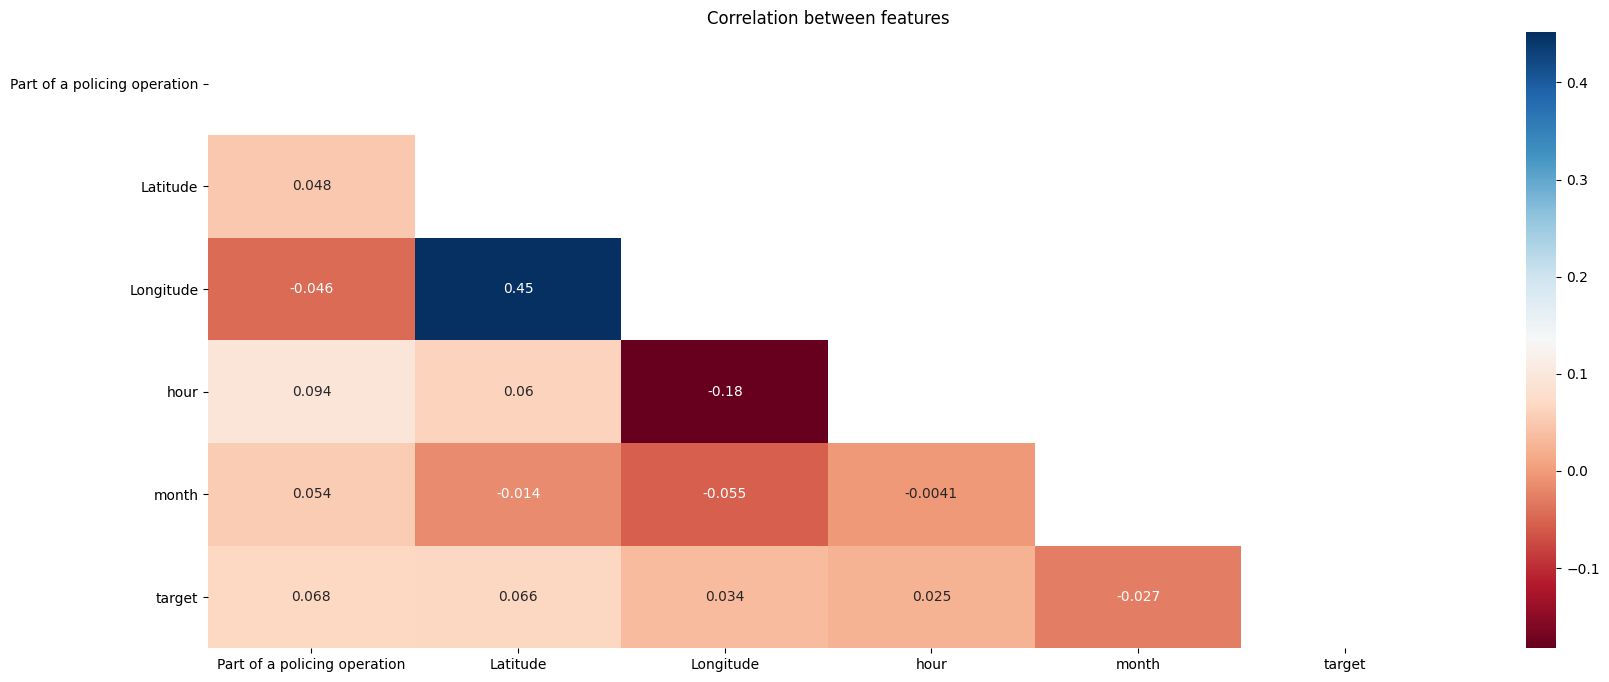

In [42]:
corr_matrix = df_processed.corr(method='spearman')

lower_triangle_mask = np.triu(np.ones(corr_matrix.shape)).astype(bool)
cor_mat_lower = corr_matrix.mask(lower_triangle_mask)

plt.figure(figsize = (20,8)) # <-- just sets the figure size 
plt.title("Correlation between features")

sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu');

In [43]:
df_processed['Latitude'].mean()

51.84213568559377

In [44]:
df_processed['Longitude'].mean()

-1.4840637990180106